# Problem Statement

With environmental issues and health becoming trending topics, usage of bicycles as a mode of
transportation has gained traction in recent years. To encourage bike usage, cities across the world have
successfully rolled out bike sharing programs. Under such schemes, riders can rent bicycles using manual/
automated kiosks spread across the city for defined periods. In most cases, riders can pick up bikes from one
location and return them to any other designated place.
The bike sharing platforms from across the world are hotspots of all sorts of data, ranging from travel
time, start and end location, demographics of riders, and so on. This data along with alternate sources
of information such as weather, traffic, terrain, and so on makes it an attractive proposition for different
research areas.
The Capital Bike Sharing dataset contains information related to one such bike sharing program
underway in Washington DC. Given this augmented (bike sharing details along with weather information)
dataset, can we forecast bike rental demand for this program?

# Exploratory Data Analysis


Now that we have an overview of the business case and a formal problem statement, the very next stage is to
explore and understand the data. This is also called the Exploratory Data Analysis (EDA) step.
EDA is one of the most important phases in the whole workflow and can help with not just
understanding the dataset, but also in presenting certain fine points that can be useful in the coming steps.

Preprocessing

The EDA process begins with loading the data into the environment, getting a quick look at it along with
count of records and number of attributes.

In [2]:
import pandas as pd
import os

hour_df = pd.read_csv(os.path.join(os.path.dirname(os.path.abspath('__file__')),'data/hour.csv'))
print('Shape of dataset: {}'.format(hour_df.shape))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Shape of dataset: (17379, 17)


In [5]:
os.path.join(os.path.dirname(os.path.abspath('__file__')),'data/hour.csv')

'C:\\Users\\omcar\\Data_Science\\4_EDA\\Projects\\Bike_Sharing\\data/hour.csv'

The dataset contains more than 17k records with 17 attributes. Let’s check the top few rows to see how
the data looks.

In [6]:
display(hour_df.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


The data seems to have loaded correctly. Next, we need to check what data types pandas has inferred
and if any of the attributes require type conversions.

In [8]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

As mentioned in the documentation for the dataset, there are bike sharing as well as weather attributes
available. The attribute dteday would require type conversion from object (or string type) to timestamp.
Attributes like season, holiday, weekday, and so on are inferred as integers by pandas, and they would
require conversion to categoricals for proper understanding.

Before jumping into type casting attributes, the following snippet cleans up the attribute names to make
them more understandable and pythonic.

In [9]:
hour_df.rename(columns = {'instant':'rec_id',
                      'dteday':'datetime',
                      'holiday':'is_holiday',
                      'workingday':'is_workingday',
                      'weathersit':'weather_condition',
                      'hum':'humidity',
                      'mnth':'month',
                      'cnt':'total_count',
                      'hr':'hour',
                      'yr':'year'}, inplace = True)

In [10]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
hour_df['season'].value_counts()

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

Now that we have attribute names cleaned up, we perform type-casting of attributes using utilities like
pd.to_datetime() and astype().

### Typecast Attributes

In [13]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

#categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [14]:
hour_df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
hour                       category
is_holiday                 category
weekday                    category
is_workingday              category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

The dataset after preprocessing (which we performed in the previous step) is ready for some visual
inspection. We begin with visualizing hourly ridership counts across the seasons.

# Visualize Attributes, Trends and Relationships

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

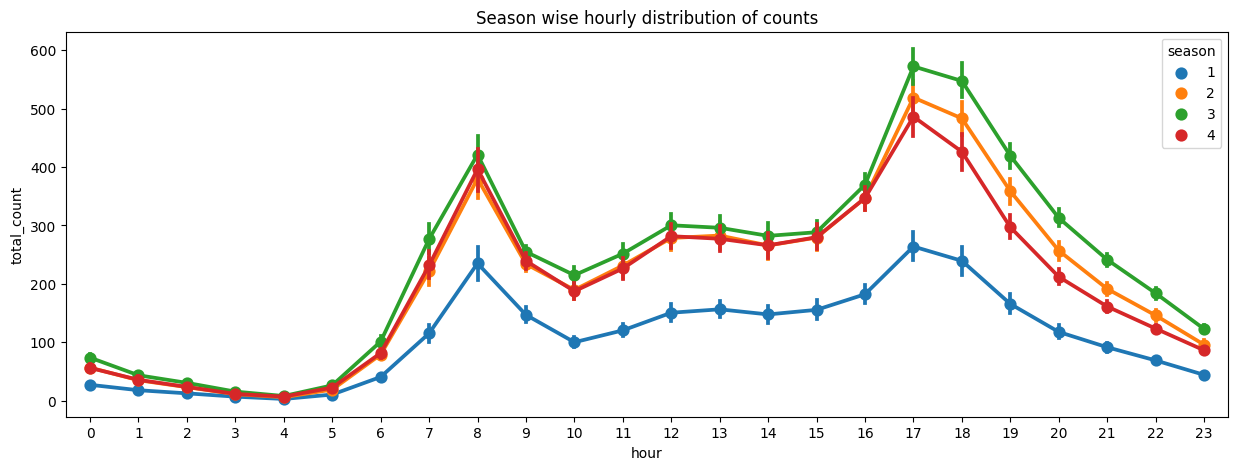

In [15]:
import seaborn as sn
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize = (15,5))
sn.pointplot(data = hour_df[['hour','total_count','season']],x='hour',y='total_count',hue='season',ax=ax)
ax.set(title = 'Season wise hourly distribution of counts')

Seasons are encoded as 1:spring, 2:summer, 3:fall, 4:winter 
Lets Convert season names to readable strings and visualize data again

In [16]:
seasons_dict = {1:'spring',2:"summer",3:'fall',4: 'winter'}

# #replacing values of season column
hour_df['season'] = hour_df['season'].map(seasons_dict)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Season wise hourly distribution of counts')]

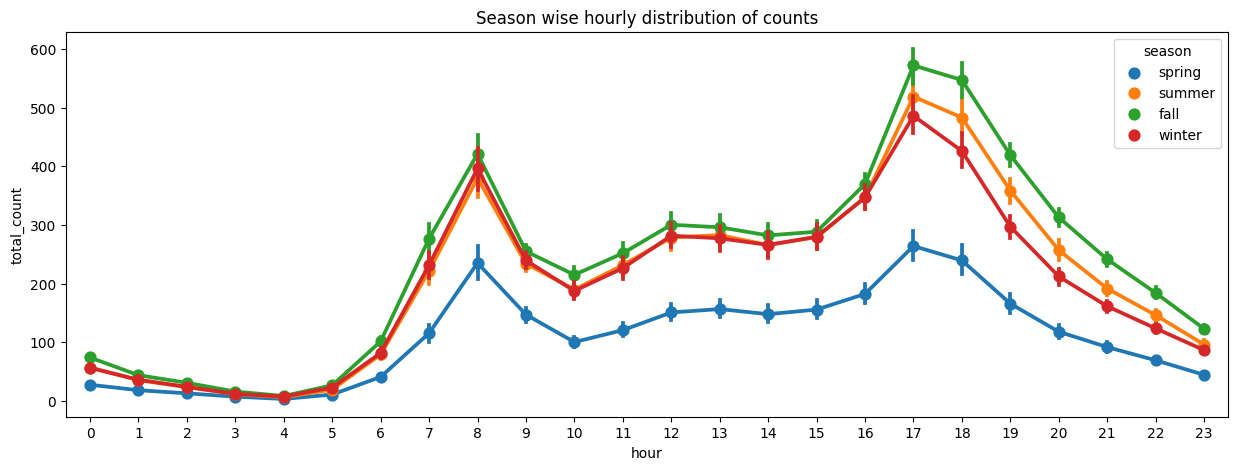

In [17]:
fig,ax = plt.subplots(figsize = (15,5))
sn.pointplot(data = hour_df[['hour','total_count','season']],x='hour',y='total_count',hue='season',ax=ax)
ax.set(title = 'Season wise hourly distribution of counts')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

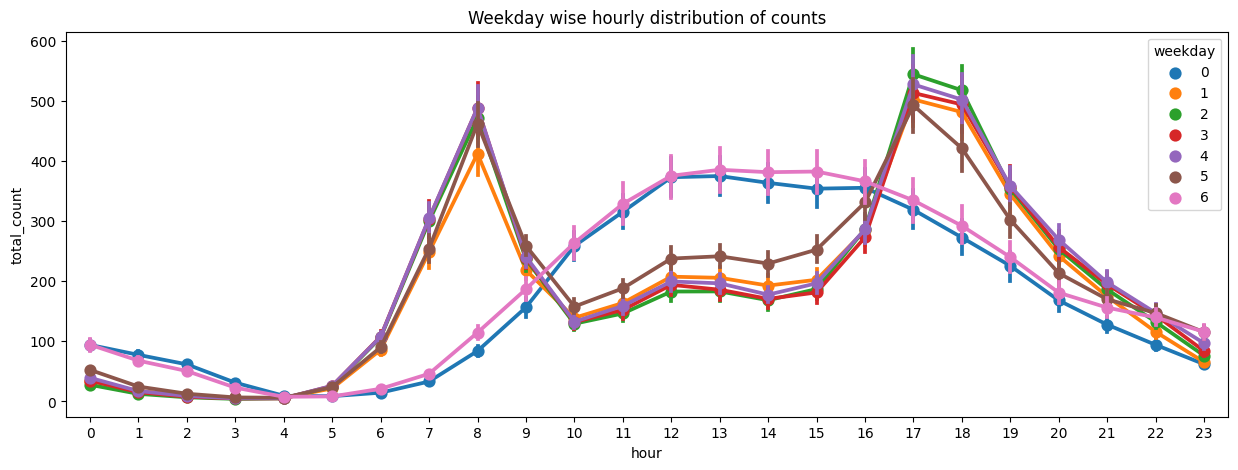

In [18]:
fig,ax = plt.subplots(figsize = (15,5))
sn.pointplot(data=hour_df[['hour','total_count','weekday']],x='hour',y='total_count',hue='weekday',ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

Weekends (0 and 6) and Weekdays (1-5) show different usage trends with weekend's peak usage in during afternoon hours

Weekdays follow the overall trend, similar to one visualized in the previous plot

Weekdays have higher usage as compared to weekends

It would be interesting to see the trends for casual and registered users separately

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Point Plot for hourly distribution of counts over months')]

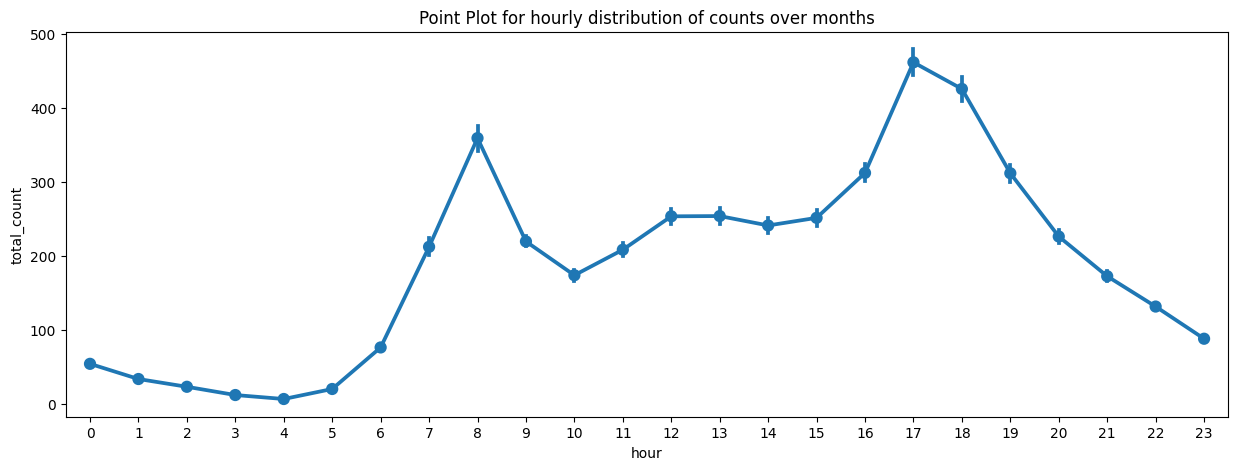

In [19]:
fig,ax = plt.subplots(figsize=(15,5))
sn.pointplot(data = hour_df[['hour','total_count']], x= 'hour', y = 'total_count', ax = ax)
ax.set(title = 'Point Plot for hourly distribution of counts over months')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Box Plot for hourly distribution of counts over months')]

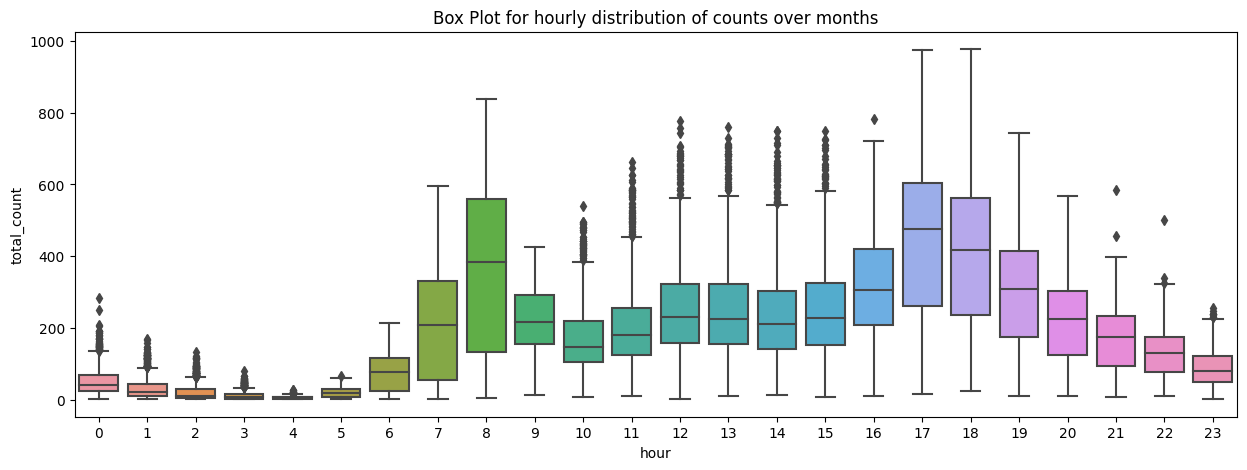

In [20]:
fig,ax = plt.subplots(figsize=(15,5))
sn.boxplot(data = hour_df[['hour','total_count']], x= 'hour', y = 'total_count', ax = ax)
ax.set(title = 'Box Plot for hourly distribution of counts over months')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Monthly distribution of counts')]

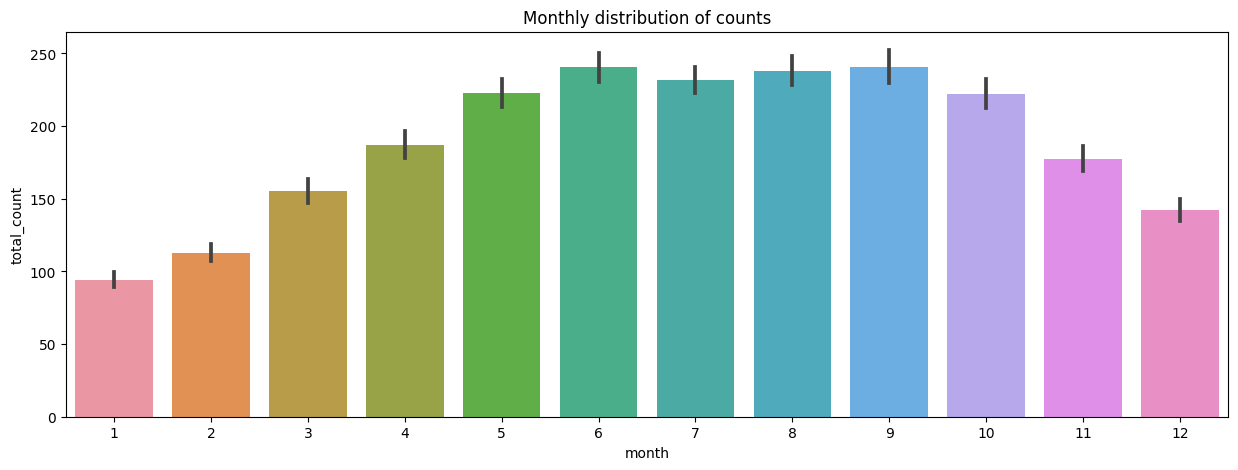

In [21]:
fig,ax = plt.subplots(figsize = (15,5))
sn.barplot(data = hour_df[['month','total_count']], x = 'month', y = 'total_count', ax = ax)
ax.set(title = 'Monthly distribution of counts')

In [22]:
hour_df['year'].unique()

[0, 1]
Categories (2, int64): [0, 1]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


[Text(0.5, 1.0, 'Yearly distribution of counts')]

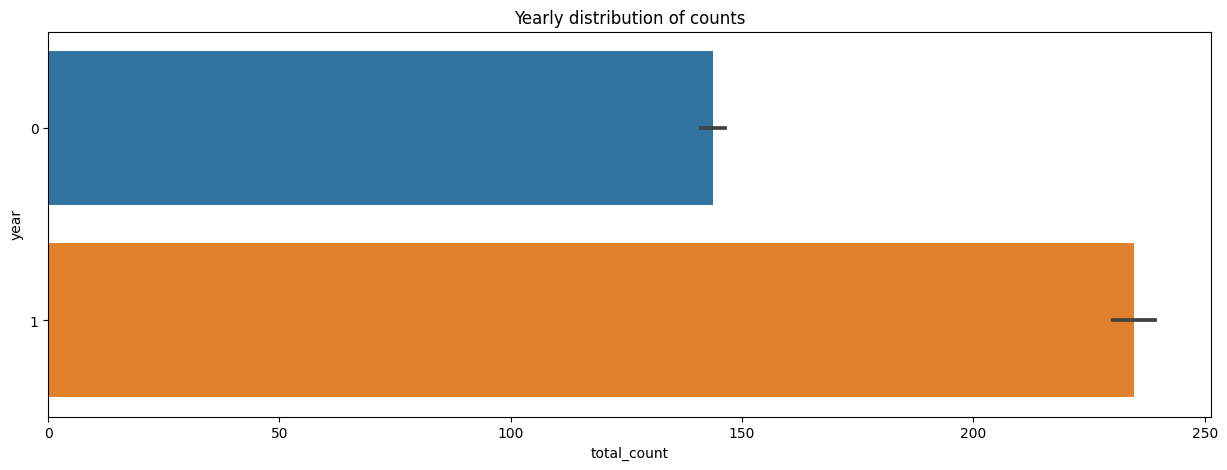

In [23]:
fig,ax = plt.subplots(figsize = (15,5))
sn.barplot(data = hour_df[['year','total_count']], x = 'total_count', y = 'year', ax = ax)
ax.set(title = 'Yearly distribution of counts')

In [24]:
year_0_counts = hour_df.loc[hour_df['year'] == 0, 'total_count'].sum()
year_1_counts = hour_df.loc[hour_df['year'] == 1, 'total_count'].sum()

In [25]:
year_0_counts

1243103

In [26]:
year_1_counts

2049576

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='year', ylabel='total_count'>

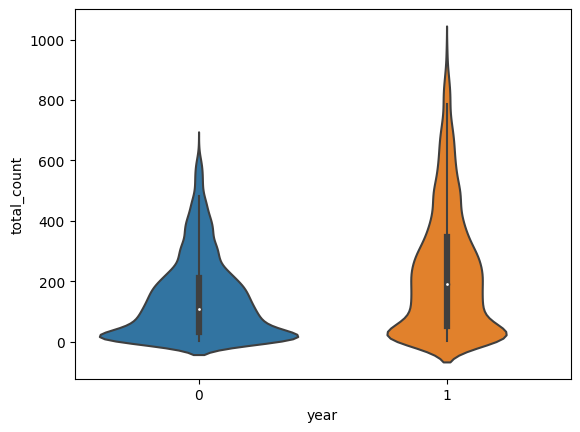

In [27]:
sn.violinplot(data = hour_df[['year','total_count']], x = 'year', y = 'total_count')

While exploring and learning about any dataset, it is imperative that we check for extreme and unlikely
values. Though we handle missing and incorrect information while preprocessing the dataset, outliers are
usually caught during EDA. Outliers can severely and adversely impact the downstream steps like modeling
and the results. We usually utilize boxplots to check for outliers in the data.

<Axes: >

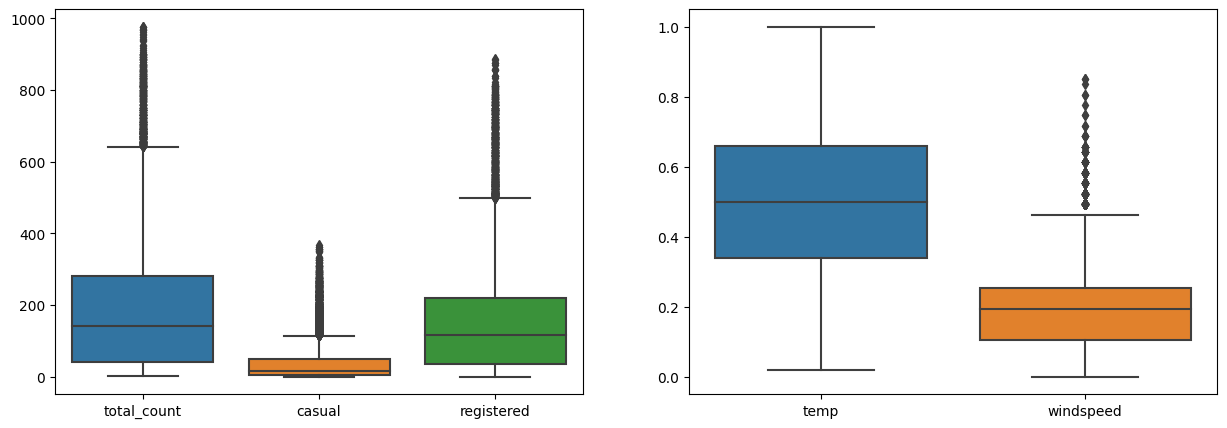

In [28]:
fig, (ax1,ax2) = plt.subplots(figsize = (15,5),ncols=2)
sn.boxplot(data = hour_df[['total_count', 'casual', 'registered']], ax = ax1)
sn.boxplot(data = hour_df[['temp','windspeed']], ax = ax2)

Correlation helps us understand relationships between different attributes of the data.

In [30]:
import numpy as np

<Axes: >

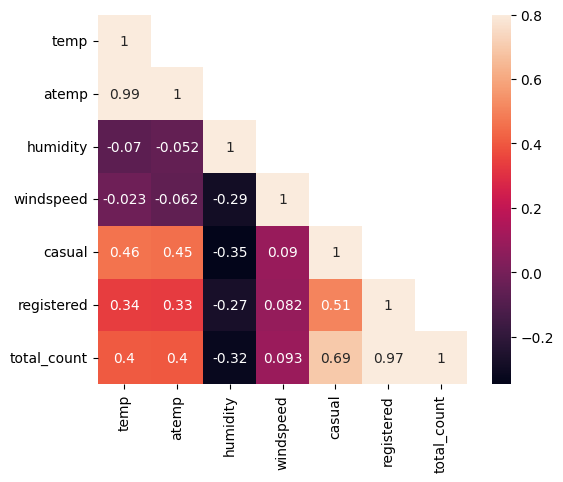

In [31]:
corrMatt = hour_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt,mask = mask,
          vmax = 0.8, square = True, annot = True)

In [32]:
corrMatt

,temp,atemp,humidity,windspeed,casual,registered,total_count
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
total_count,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


Correlation between temp and atemp is very high (as expected)

Same is the case with registered-total_count and casual-total_count

Windspeed to humidity has negative correlation

Overall correlational statistics are not very high.

## Working Day Vs Holiday Distribution


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='is_workingday', ylabel='total_count'>

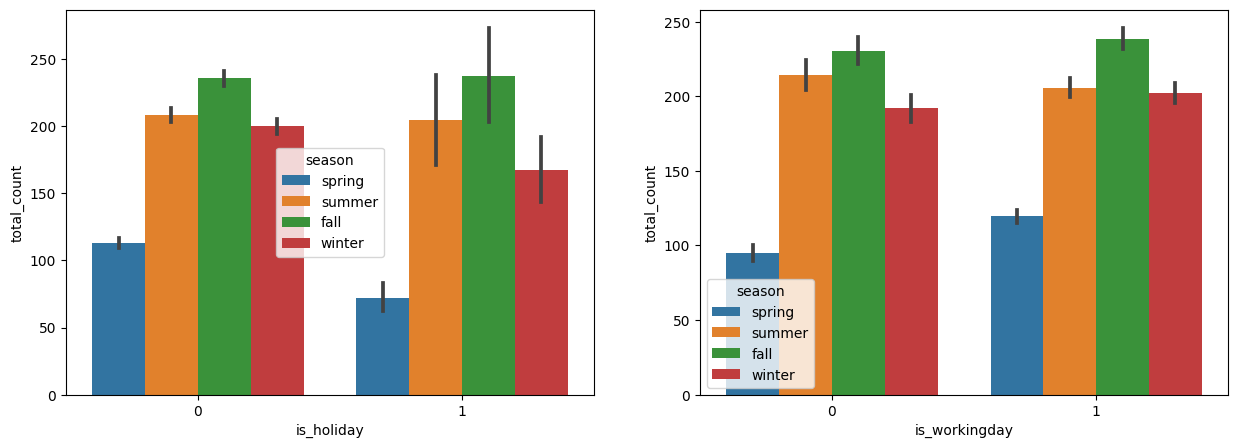

In [33]:
fig, (ax1,ax2) = plt.subplots(figsize = (15,5),ncols = 2)
sn.barplot(data = hour_df, x = 'is_holiday', y = 'total_count', hue = 'season', ax = ax1)
sn.barplot(data = hour_df, x= 'is_workingday', y = 'total_count', hue = 'season', ax = ax2)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

[Text(0.5, 1.0, 'Winter')]

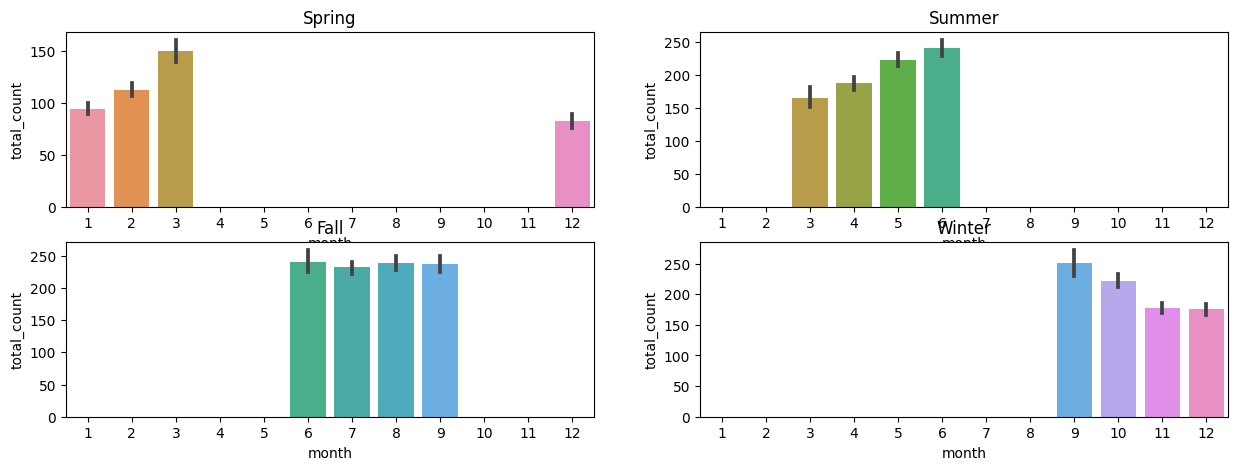

In [34]:
df_col_list = ['month','weekday','total_count']
plot_col_list= ['month','total_count']
seasons_dict = {1:'spring',2:"summer",3:'fall',4: 'winter'}
spring_df = hour_df[hour_df.season=="spring"][df_col_list]
summer_df = hour_df[hour_df.season=="summer"][df_col_list]
fall_df = hour_df[hour_df.season=="fall"][df_col_list]
winter_df = hour_df[hour_df.season=="winter"][df_col_list]

fig,ax= plt.subplots(figsize = (15,5),nrows=2,ncols=2)
sn.barplot(data=spring_df[plot_col_list],x="month",y="total_count",ax=ax[0][0],)
ax[0][0].set(title="Spring")

sn.barplot(data=summer_df[plot_col_list],x="month",y="total_count",ax=ax[0][1])
ax[0][1].set(title="Summer")

sn.barplot(data=fall_df[plot_col_list],x="month",y="total_count",ax=ax[1][0])
ax[1][0].set(title="Fall")

sn.barplot(data=winter_df[plot_col_list],x="month",y="total_count",ax=ax[1][1])  
ax[1][1].set(title="Winter")